In [ ]:
!pip install gatspy astroML

     |████████████████████████████████| 134 kB 11.0 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from astropy.timeseries import LombScargle
%matplotlib inline

In [225]:
data = pd.read_csv('PS-28_2_2022.csv')

In [226]:
data.columns

Index(['objID', 'detectID', 'filterID', 'randomDetID', 'obsTime', 'ra', 'dec',
       'raErr', 'decErr', 'extNSigma', 'airMass', 'psfFlux', 'psfFluxErr',
       'psfMajorFWHM', 'psfMinorFWHM', 'psfTheta', 'psfCore', 'psfQf',
       'psfQfPerfect', 'psfChiSq', 'psfLikelihood', 'apFlux', 'apFluxErr',
       'apFillF', 'apRadius', 'kronFlux', 'kronFluxErr', 'kronRad', 'sky',
       'skyErr', 'infoFlag', 'infoFlag2', 'infoFlag3'],
      dtype='object')

In [227]:
data['Magnitude']    = -2.5*np.log10(data['psfFlux'])
data['MagnitudeErr'] = np.sqrt(-2.5*np.log10(data['psfFluxErr']))/(len(data['Magnitude']))
data

,objID,detectID,filterID,randomDetID,obsTime,ra,dec,raErr,decErr,extNSigma,...,kronFlux,kronFluxErr,kronRad,sky,skyErr,infoFlag,infoFlag2,infoFlag3,Magnitude,MagnitudeErr
0,108202999999801438,268761539740000714,4,0.471080,56788.615576,299.999971,0.167427,0.003585,0.003807,-0.393724,...,0.000781,0.000007,2.22581,0.000081,0.000006,102760517,160,34880,7.645906,0.038022
1,108202999999801438,271060459570000631,4,0.965678,56811.604774,299.999973,0.167429,0.003069,0.002506,0.210182,...,0.000807,0.000006,1.82308,0.000048,0.000005,102760517,128,7374912,7.632583,0.038186
2,108202999999801438,271060568570000616,4,0.194035,56811.605867,299.999975,0.167430,0.002758,0.002439,0.574385,...,0.000822,0.000006,1.87543,0.000049,0.000005,102760517,128,7374912,7.632279,0.038203
3,108202999999801438,271060922570000557,4,0.101007,56811.609408,299.999968,0.167427,0.003095,0.002568,0.013384,...,0.000833,0.000006,1.91660,0.000050,0.000005,102760517,128,7374912,7.613362,0.038165
4,108202999999801438,268561914740000636,5,0.135741,56786.619326,299.999971,0.167424,0.004899,0.005591,0.632019,...,0.000950,0.000019,2.27212,0.000276,0.000018,102760517,128,7342144,7.539821,0.036971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,108202999999801438,130639100360000654,3,0.432998,55407.391268,299.999970,0.167423,0.002475,0.002102,0.261319,...,0.000760,0.000004,2.44523,0.000049,0.000003,102760517,128,7374912,7.744000,0.038899
91,108202999999801438,129349746150000617,1,0.024886,55394.497719,299.999974,0.167423,0.008260,0.007852,0.477761,...,0.000291,0.000003,3.13418,0.000007,0.000002,102760517,128,40896576,8.756345,0.039378
92,108202999999801438,131340663260000620,1,0.685602,55414.406881,299.999968,0.167425,0.004579,0.004490,0.701080,...,0.000307,0.000003,2.51399,0.000007,0.000002,102760517,128,7374912,8.717196,0.039439
93,108202999999801438,131341799260000629,1,0.906194,55414.418253,299.999974,0.167422,0.004237,0.004092,0.095854,...,0.000304,0.000003,2.63182,0.000007,0.000002,102760517,128,7374912,8.740564,0.039491


In [228]:
from collections import Counter

In [229]:
Counter(data['filterID'])

Counter({4: 23, 5: 19, 3: 24, 2: 16, 1: 13})

In [230]:
filt=data['filterID']==3

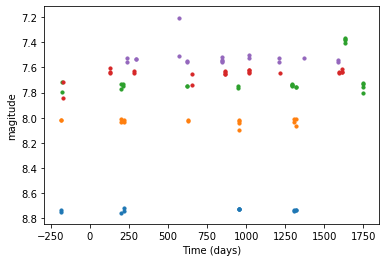

In [231]:
fig, ax = plt.subplots()
for i in range(5):
    filt=data['filterID']==i+1
    plt.scatter((data['obsTime'] - 55197)[filt], data['Magnitude'][filt],s=10)
ax.set(xlabel='Time (days)', ylabel='magitude')
ax.invert_yaxis();
    

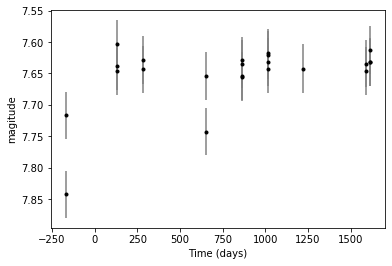

In [232]:
filt=data['filterID']==4
fig, ax = plt.subplots()
ax.errorbar((data['obsTime'] - 55197)[filt], data['Magnitude'][filt], data['MagnitudeErr'][filt], fmt='.k', ecolor='gray')
ax.set(xlabel='Time (days)', ylabel='magitude')
ax.invert_yaxis();

In [233]:
t=(data['obsTime'] - 55197)[filt]
y=data['Magnitude'][filt]
dy=data['MagnitudeErr'][filt]

In [234]:
frequency, power = LombScargle(t, y, dy).autopower()

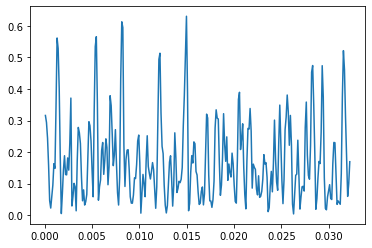

In [235]:
plt.plot(frequency,power)

In [236]:
period=1/frequency[np.argmax(power)]
period

66.8174154269662

In [237]:
print(1/frequency[np.argsort(power)[::-1]][:10])

[ 66.81741543 123.03620634 121.36224435 183.92010226 775.66303996
 187.79210441 713.60999676  31.68783289  82.21313327  67.32169781]


In [244]:
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1)
ls = LombScargle(t, y, dy)
y_fit = ls.model(t_fit, 1/66)

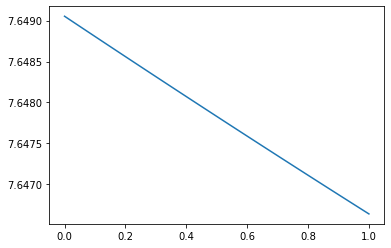

In [245]:
plt.plot(t_fit,y_fit)

In [7]:
t=data['obsTime'] - 55197
y=data['Magnitude']
dy=data['MagnitudeErr']

In [14]:
tn=t[np.argsort(t)]
yn=y[np.argsort(t)]
dyn=dy[np.argsort(t)]

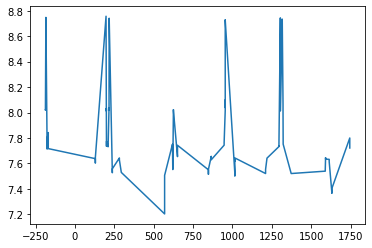

In [15]:
plt.plot(tn,yn)

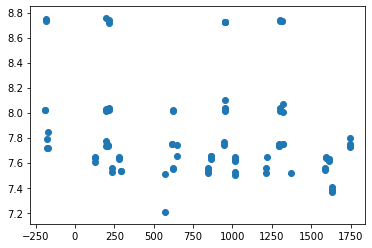

In [16]:
plt.scatter(tn,yn)

In [17]:
frequency, power = LombScargle(tn, yn, dyn).autopower()

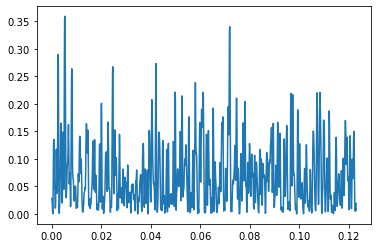

In [18]:
plt.plot(frequency,power)

In [19]:
frequency, power = LombScargle(t, y, dy).autopower()

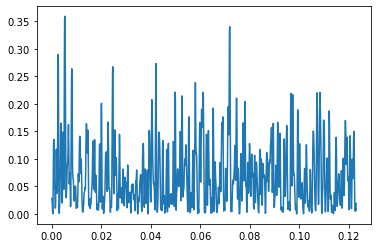

In [20]:
plt.plot(frequency,power)

In [115]:
period=1/frequency[np.argmax(power)]
period

array([19327.996159])

In [130]:
1/frequency[np.argsort(power)[-3]]

13.915044030957548

In [122]:
np.argmax(power)

51

In [134]:
print(1/frequency[np.argsort(power)[::-1]][:10])

[187.65044815 191.3662986   13.91504403  13.93510898 184.0761539
 378.98031684  23.77367301 195.23228443  40.51990809 123.10825579]


In [38]:
best_frequency

0.005329057350419553

In [39]:
1/0.07

14.285714285714285

In [ ]:
y_fit = ls.model(t_fit, best_frequency)

In [31]:
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1)
ls = LombScargle(tn, yn, dyn)
y_fit = ls.model(t_fit, best_frequency)

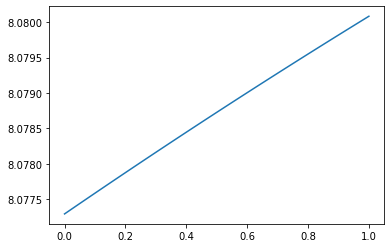

In [32]:
plt.plot(t_fit,y_fit)

In [36]:
theta = ls.model_parameters(best_frequency)
theta

array([-0.0244028 ,  0.08791824,  0.27295236])

In [21]:
model = LombScargleFast().fit(data['obsTime'] - 55197, data['Magnitude'], data['MagnitudeErr'])
periods, power = model.periodogram_auto(nyquist_factor=100)

fig, ax = plt.subplots()
ax.plot(periods, power)
ax.set(xlim=(0.2, 1.4), ylim=(0, 0.8),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power');

NameError: name 'LombScargleFast' is not defined

In [ ]:
# set range and find period
model.optimizer.period_range=(0.4, 1.4)
period = model.best_period
print("period = {0}".format(period))

Finding optimal frequency:
 - Estimated peak width = 0.00325
 - Using 5 steps per peak; omega_step = 0.00065
 - User-specified period range:  0.4 to 1.4
 - Computing periods at 17259 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
period = 0.42945995302138795


In [137]:
period=13

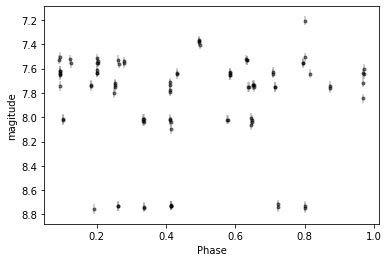

In [138]:
phase = ( (data['obsTime'] - 55197) / period) % 1

fig, ax = plt.subplots()
ax.errorbar(phase, data['Magnitude'], data['MagnitudeErr'], fmt='.k', ecolor='gray', alpha=0.5)
ax.set(xlabel='Phase', ylabel='magitude')
ax.invert_yaxis();

In [140]:
curve="test_variables/EPOCH_PHOTOMETRY-Gaia DR2 6083498811731561600.xml"

In [147]:
from astropy.io.votable import parse_single_table
votable = parse_single_table(curve)

In [197]:
votable.array.dtype.fields.keys()

dict_keys(['source_id', 'transit_id', 'band', 'time', 'mag', 'flux', 'flux_error', 'flux_over_error', 'rejected_by_photometry', 'rejected_by_variability', 'other_flags', 'solution_id'])

In [155]:
votable.array['time']

masked_array(data=[1700.7074473128841, 1700.781449252896,
                   1732.0706331101378, 1732.1446364450815,
                   1827.7641089388862, 1827.940272589934,
                   1850.5112319004388, 1880.000224521616,
                   2002.171497081564, 2002.245527394922,
                   2058.1544319351406, 2058.2284050478,
                   2203.0603787654527, 2229.728448405832,
                   2229.8024616096327, 2255.975724217955,
                   2256.0497427170867, 1700.781764297969,
                   1732.0709475785352, 1732.1449509335393,
                   1827.7644170290725, 1827.9405869375264,
                   1850.5115461694886, 1880.0005393698364,
                   2002.1718398223852, 2002.2458421199574,
                   2058.1547463603106, 2058.2287478951052,
                   2229.7287627380365, 2229.802776234889,
                   2255.976045920211, 2256.050057312728,
                   1700.7818494883593, 1732.0710359769473,
           

In [201]:
df=pd.DataFrame(votable.array.tolist(),columns=votable.array.dtype.fields.keys())

In [216]:
df.head()

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
0,6083498811731561600,16802556169303951,G,1700.707447,14.295354,36074.860682,41.553146,868.161987,False,False,1,369295551293819386
1,6083498811731561600,16806648478733389,G,1700.781449,14.402168,32694.826504,32.723799,999.114624,False,False,1,369295551293819386
2,6083498811731561600,18536920400810310,G,1732.070633,14.684681,25204.250476,29.781096,846.317078,False,False,1,369295551293819386
3,6083498811731561600,18541012673680133,G,1732.144636,14.340110,34618.025113,58.838785,588.353821,False,False,4097,369295551293819386
4,6083498811731561600,23828291733722639,G,1827.764109,14.704565,24746.882129,35.388637,699.288940,False,False,131073,369295551293819386


In [204]:
filt=df.band=='G'

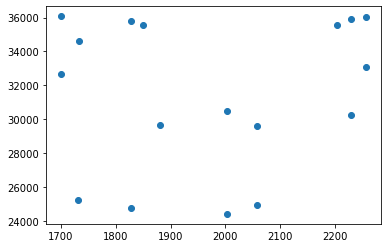

In [206]:
plt.scatter(df.time[filt],df.flux[filt])

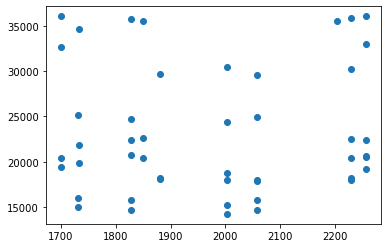

In [207]:
plt.scatter(df.time,df.flux)

In [218]:
t=df.time[filt]
y=df.mag[filt]
#dy=df.flux_error[filt]

In [219]:
ls = LombScargle(t, y)

In [220]:
frequency, power = ls.autopower()

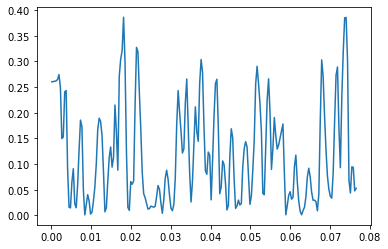

In [221]:
plt.plot(frequency,power)

In [222]:
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1)
y_fit = ls.model(t_fit, best_frequency)

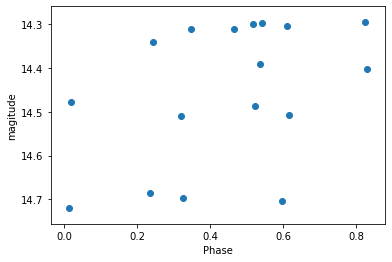

In [224]:
phase = ( t / period) % 1

fig, ax = plt.subplots()
ax.scatter(phase,y)
#ax.errorbar(phase, y, dy, fmt='.k', ecolor='gray', alpha=0.5)
ax.set(xlabel='Phase', ylabel='magitude')
ax.invert_yaxis();